In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\svire\Downloads\Salary_Data.csv")

In [4]:
df.head()

YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [6]:
df.describe()

YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000

In [7]:
import statsmodels.formula.api as smf

In [8]:
exp = df['YearsExperience']
salary=df['Salary']
exp,salary

(0      1.1
 1      1.3
 2      1.5
 3      2.0
 4      2.2
 5      2.9
 6      3.0
 7      3.2
 8      3.2
 9      3.7
 10     3.9
 11     4.0
 12     4.0
 13     4.1
 14     4.5
 15     4.9
 16     5.1
 17     5.3
 18     5.9
 19     6.0
 20     6.8
 21     7.1
 22     7.9
 23     8.2
 24     8.7
 25     9.0
 26     9.5
 27     9.6
 28    10.3
 29    10.5
 Name: YearsExperience, dtype: float64,
 0      39343.0
 1      46205.0
 2      37731.0
 3      43525.0
 4      39891.0
 5      56642.0
 6      60150.0
 7      54445.0
 8      64445.0
 9      57189.0
 10     63218.0
 11     55794.0
 12     56957.0
 13     57081.0
 14     61111.0
 15     67938.0
 16     66029.0
 17     83088.0
 18     81363.0
 19     93940.0
 20     91738.0
 21     98273.0
 22    101302.0
 23    113812.0
 24    109431.0
 25    105582.0
 26    116969.0
 27    112635.0
 28    122391.0
 29    121872.0
 Name: Salary, dtype: float64)

array([[<Axes: title={'center': 'YearsExperience'}>,
        <Axes: title={'center': 'Salary'}>]], dtype=object)

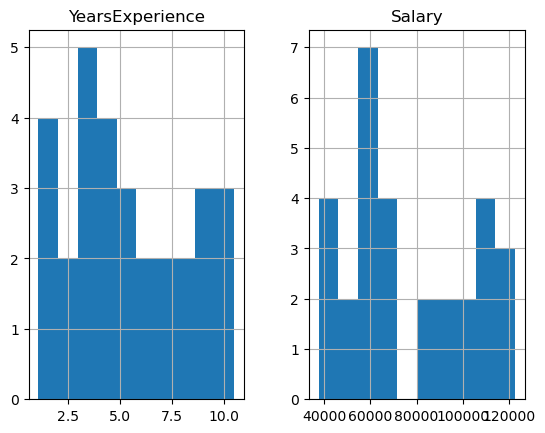

In [9]:
df.hist()

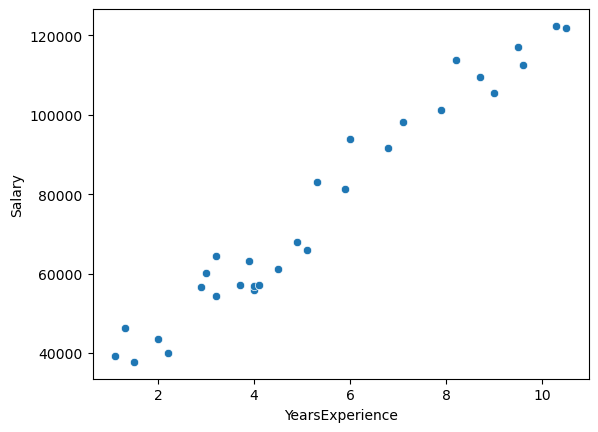

In [10]:
sns.scatterplot(x=exp,y=salary,data=df)
plt.show()

In [11]:
from sklearn.linear_model import LinearRegression

In [13]:
model =LinearRegression()
x= df[['YearsExperience']]
y= salary
model.fit(x,y)

LinearRegression()

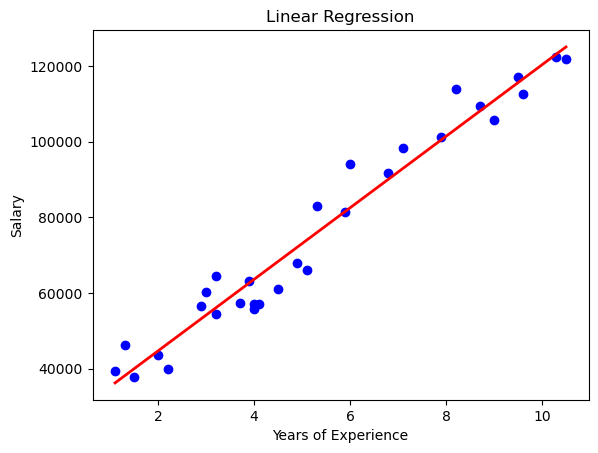

In [17]:
plt.scatter(x,y,color='blue')
plt.plot(x,model.predict(x),color='red',linewidth=2)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Linear Regression')
plt.show()

In [18]:
import statsmodels.formula.api as smf

In [19]:
slr = smf.ols('Salary~YearsExperience',data=df)
model=slr.fit()

In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 05 Jan 2024   Prob (F-statistic):           1.14e-20
Time:                        15:39:31   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
pred = model.predict(df['YearsExperience'])

In [22]:
model.resid

0      3155.841248
1      8127.848783
2     -2236.143681
3     -1167.124842
4     -6691.117306
5      3444.909069
6      6007.912837
7     -1587.079627
8      8412.920373
9     -3568.060788
10      570.946748
11    -7798.049484
12    -6635.049484
13    -7456.045717
14    -7206.030645
15    -4159.015574
16    -7958.008038
17     7210.999498
18     -183.977895
19    11448.025873
20     1686.056015
21     5386.067319
22      855.097462
23    10530.108765
24     1424.127605
25    -5259.861092
26     1402.157748
27    -3876.838485
28     -735.812110
29    -3144.804574
dtype: float64

In [23]:
rmse = np.sqrt(np.mean((np.array(df['YearsExperience'])-np.array(pred))**2))
rmse

80440.84508275457

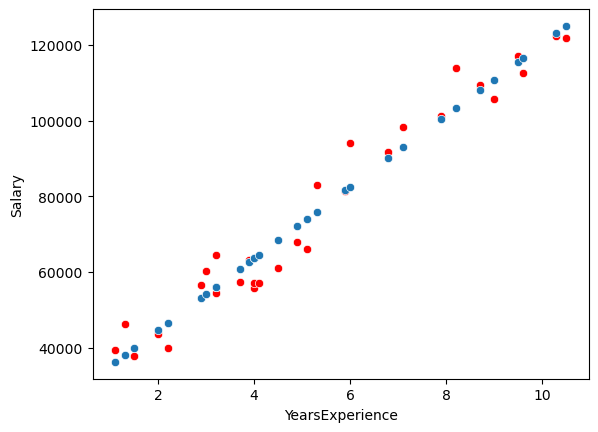

In [24]:
sns.scatterplot(x='YearsExperience',y='Salary',data=df,color='red')
sns.scatterplot(x='YearsExperience',y=pred,data=df)
plt.show()

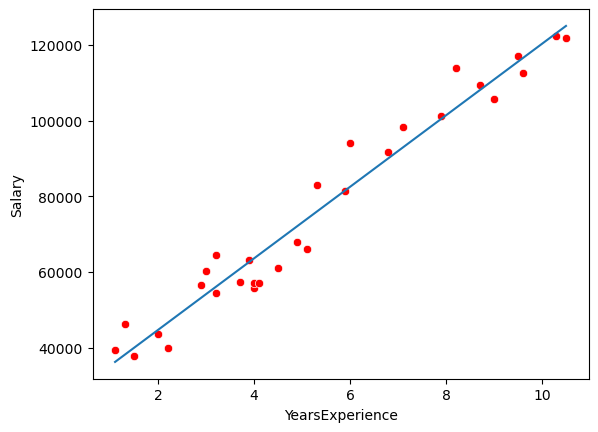

In [26]:
sns.scatterplot(x="YearsExperience",y="Salary",data=df,color="red")
sns.lineplot(x="YearsExperience",y=pred,data=df)
plt.show()

In [27]:
model2=smf.ols("np.log(Salary)~YearsExperience",data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Fri, 05 Jan 2024   Prob (F-statistic):           7.03e-18
Time:                        15:46:06   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
pred2=model2.predict(df["YearsExperience"])
pred2

0     10.645400
1     10.670491
2     10.695581
3     10.758308
4     10.783398
5     10.871215
6     10.883761
7     10.908851
8     10.908851
9     10.971578
10    10.996668
11    11.009213
12    11.009213
13    11.021759
14    11.071940
15    11.122121
16    11.147212
17    11.172302
18    11.247574
19    11.260119
20    11.360482
21    11.398117
22    11.498480
23    11.536116
24    11.598842
25    11.636478
26    11.699204
27    11.711750
28    11.799567
29    11.824657
dtype: float64

In [29]:
pred2=np.exp(pred2)
pred2

0      41998.957468
1      43066.066794
2      44160.289228
3      47019.029189
4      48213.688474
5      52639.142472
6      53303.675386
7      54658.014935
8      54658.014935
9      58196.330788
10     59674.982903
11     60428.338456
12     60428.338456
13     61191.204604
14     64340.199291
15     67651.246149
16     69370.128712
17     71132.684635
18     76693.630780
19     77661.835040
20     85860.704208
21     89153.725393
22     98565.809591
23    102346.110512
24    108971.540758
25    113150.933364
26    120475.819601
27    121996.743836
28    133194.621344
29    136578.829694
dtype: float64

In [30]:
rmse2=np.sqrt(np.mean((np.array(df["YearsExperience"])-np.array(pred2))**2))
rmse2

80857.92236328156

<Axes: xlabel='YearsExperience', ylabel='Salary'>

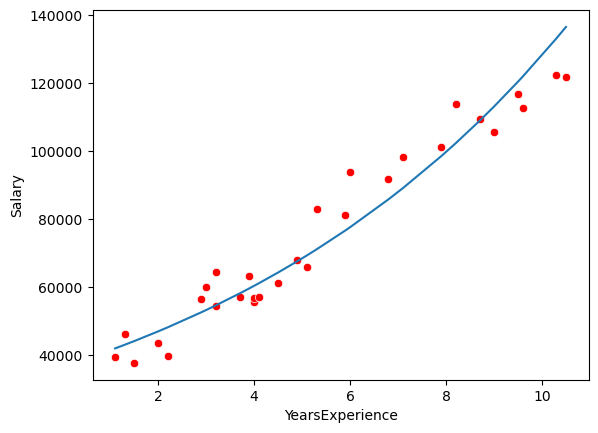

In [31]:
sns.scatterplot(x="YearsExperience",y="Salary",data=df,color="red")
sns.lineplot(x="YearsExperience",y=pred2,data=df)

In [32]:
df["YearsExperience_sq"]=df["YearsExperience"]*df["YearsExperience"]
df.head()

YearsExperience   Salary  YearsExperience_sq
0              1.1  39343.0                1.21
1              1.3  46205.0                1.69
2              1.5  37731.0                2.25
3              2.0  43525.0                4.00
4              2.2  39891.0                4.84

In [33]:
model3=smf.ols("np.log(Salary)~YearsExperience+YearsExperience_sq",data=df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     249.2
Date:                Fri, 05 Jan 2024   Prob (F-statistic):           3.95e-18
Time:                        15:46:48   Log-Likelihood:                 32.391
No. Observations:                  30   AIC:                            -58.78
Df Residuals:                      27   BIC:                            -54.58
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             10.3369      0.067    154.368      0.000      10.199      10.474
YearsExperience        0.2024      0.027      7.601      0.000       0.148       0.257
YearsExperience_sq    -0.0066      0.002     -2.957      0.006      -0.011      -0.002
==============================================================================
Omnibus:                        1.099   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.577   Jarque-Bera (JB):                1.002
Skew:                           0.260   Prob(JB):                        0.606
Kurtosis:                       2.271   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
pred3=model3.predict(df[["YearsExperience","YearsExperience_sq"]])

In [35]:
pred3=np.exp(pred3)
pred3

0      38233.559684
1      39686.674746
2      41173.227466
3      45033.440973
4      46633.832589
5      52477.426306
6      53341.747319
7      55091.465477
8      55091.465477
9      59582.917523
10     61423.509899
11     62352.647026
12     62352.647026
13     63287.467325
14     67080.231957
15     70949.981000
16     72909.896294
17     74884.321575
18     80877.084894
19     81883.588147
20     89970.445587
21     93001.652359
22    101003.996109
23    103952.199275
24    108770.218622
25    111590.303652
26    116146.198447
27    117033.009807
28    122976.902760
29    124581.554019
dtype: float64

In [36]:
rmse3=np.sqrt(np.mean((np.array(df["YearsExperience"])-np.array(pred3))**2))
rmse3

80259.68479929295

<Axes: xlabel='YearsExperience', ylabel='Salary'>

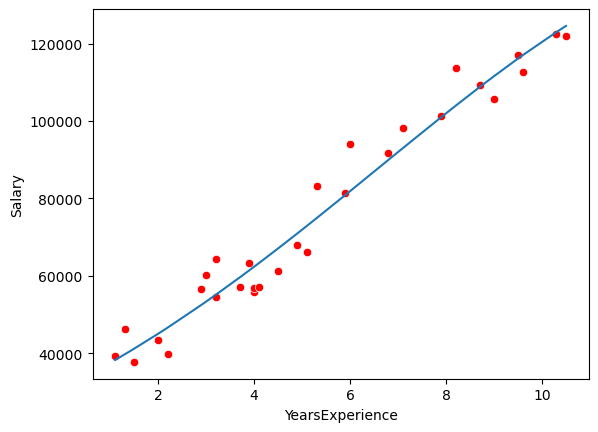

In [37]:
sns.scatterplot(x="YearsExperience",y="Salary",data=df,color="red")
sns.lineplot(x="YearsExperience",y=pred3,data=df)